# Analyze the results of various anomaly detectors

In [1]:
from dtaianomaly.visualization import read_results, plot_performance, plot_ranking, plot_critical_difference_diagram

## Read the data

In [2]:
results = read_results(
    directory='../large_results',
    map_sub_dir_name={
        'Raw anomaly detector': lambda sub_dir: sub_dir,
        'Anomaly detector': lambda sub_dir: sub_dir.split('_')[0],
        'Window size': lambda sub_dir: int(sub_dir.split('_')[1])
    }
)
results.head()

,collection_name,dataset_name,Seed,affiliation_f1,affiliation_f1_gt_contamination,roc_vus,pr_vus,fbeta,fbeta_05,fbeta_2,Time fit (s),Time predict (s),Peak memory fit (KiB),Peak memory predict (KiB),Raw anomaly detector,Anomaly detector,Window size
0,Demo,Demo1,0.0,0.977169,1.000000,0.999480,0.993324,0.494624,0.379538,0.709877,0.63076,0.03295,2643.83105,1984.35645,IForest_128,IForest,128
1,Demo,Demo2,0.0,0.581042,0.903315,0.964779,0.584362,0.321678,0.228628,0.542453,0.70619,0.06641,4134.95605,3536.75781,IForest_128,IForest,128
2,Demo,Demo3,0.0,0.962360,0.657356,0.983325,0.853912,0.647215,0.556062,0.774112,0.73945,0.05363,4109.13770,3536.75781,IForest_128,IForest,128
3,Demo,Demo4,0.0,0.643265,0.656801,0.969735,0.803280,0.594595,0.536823,0.666300,0.75736,0.11368,4134.75684,3536.75781,IForest_128,IForest,128
4,Dodgers,101-freeway-traffic,0.0,0.613770,0.617117,0.822383,0.615622,0.342471,0.353872,0.331781,2.11579,2.11315,78363.93750,77440.79688,IForest_128,IForest,128


In [3]:
results['Total time (s)'] = results['Time fit (s)'] + results['Time predict (s)']
results['Peak memory (KiB)'] = results[['Peak memory fit (KiB)', 'Peak memory predict (KiB)']].max(axis=1)
results.head()

,collection_name,dataset_name,Seed,affiliation_f1,affiliation_f1_gt_contamination,roc_vus,pr_vus,fbeta,fbeta_05,fbeta_2,Time fit (s),Time predict (s),Peak memory fit (KiB),Peak memory predict (KiB),Raw anomaly detector,Anomaly detector,Window size,Total time (s),Peak memory (KiB)
0,Demo,Demo1,0.0,0.977169,1.000000,0.999480,0.993324,0.494624,0.379538,0.709877,0.63076,0.03295,2643.83105,1984.35645,IForest_128,IForest,128,0.66371,2643.83105
1,Demo,Demo2,0.0,0.581042,0.903315,0.964779,0.584362,0.321678,0.228628,0.542453,0.70619,0.06641,4134.95605,3536.75781,IForest_128,IForest,128,0.77260,4134.95605
2,Demo,Demo3,0.0,0.962360,0.657356,0.983325,0.853912,0.647215,0.556062,0.774112,0.73945,0.05363,4109.13770,3536.75781,IForest_128,IForest,128,0.79308,4109.13770
3,Demo,Demo4,0.0,0.643265,0.656801,0.969735,0.803280,0.594595,0.536823,0.666300,0.75736,0.11368,4134.75684,3536.75781,IForest_128,IForest,128,0.87104,4134.75684
4,Dodgers,101-freeway-traffic,0.0,0.613770,0.617117,0.822383,0.615622,0.342471,0.353872,0.331781,2.11579,2.11315,78363.93750,77440.79688,IForest_128,IForest,128,4.22894,78363.93750


## Visualize the results

### The results for each anomaly detector setting

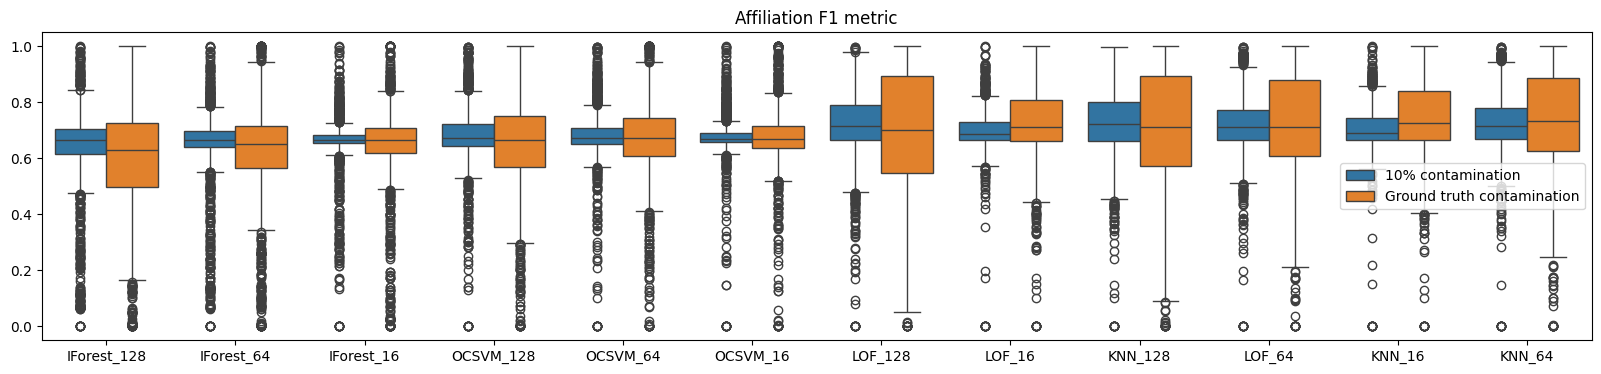

In [4]:
plot_performance(
    data=results,
    x_value='Raw anomaly detector',
    values_of_interest=['affiliation_f1', 'affiliation_f1_gt_contamination'],
    rename_values_of_interest={
        'affiliation_f1': '10% contamination',
        'affiliation_f1_gt_contamination': 'Ground truth contamination'
    },
    title='Affiliation F1 metric'
);

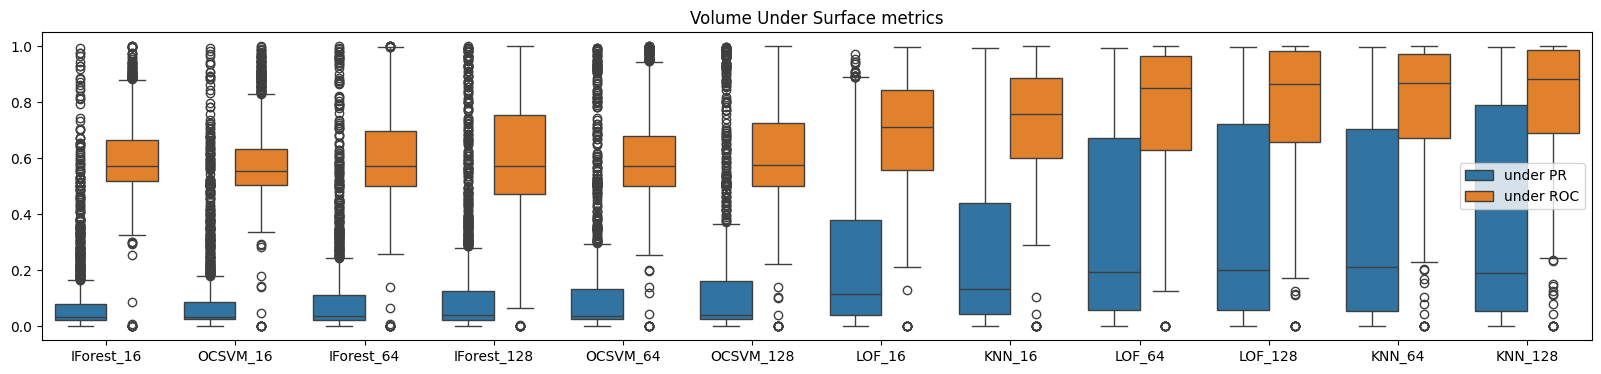

In [5]:
plot_performance(
    data=results,
    x_value='Raw anomaly detector',
    values_of_interest=['pr_vus', 'roc_vus'],
    rename_values_of_interest={
        'pr_vus': 'under PR',
        'roc_vus': 'under ROC'
    },
    title='Volume Under Surface metrics'
);

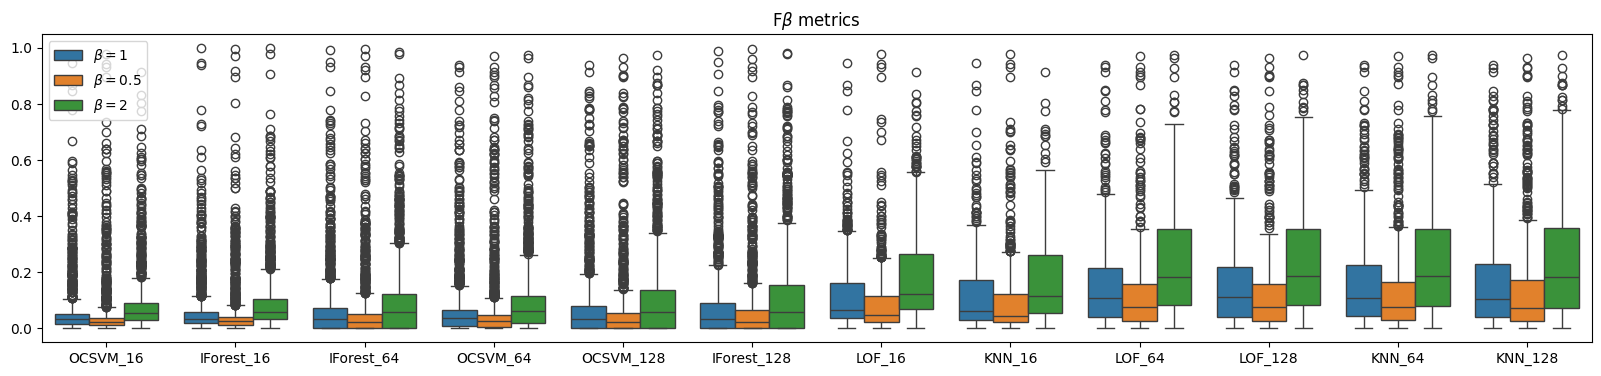

In [6]:
plot_performance(
    data=results,
    x_value='Raw anomaly detector',
    values_of_interest=['fbeta', 'fbeta_05', 'fbeta_2'],
    rename_values_of_interest={
        'fbeta': r'$\beta = 1$',
        'fbeta_05': r'$\beta = 0.5$',
        'fbeta_2': r'$\beta = 2$',
    },
    title=r'F$\beta$ metrics'
);

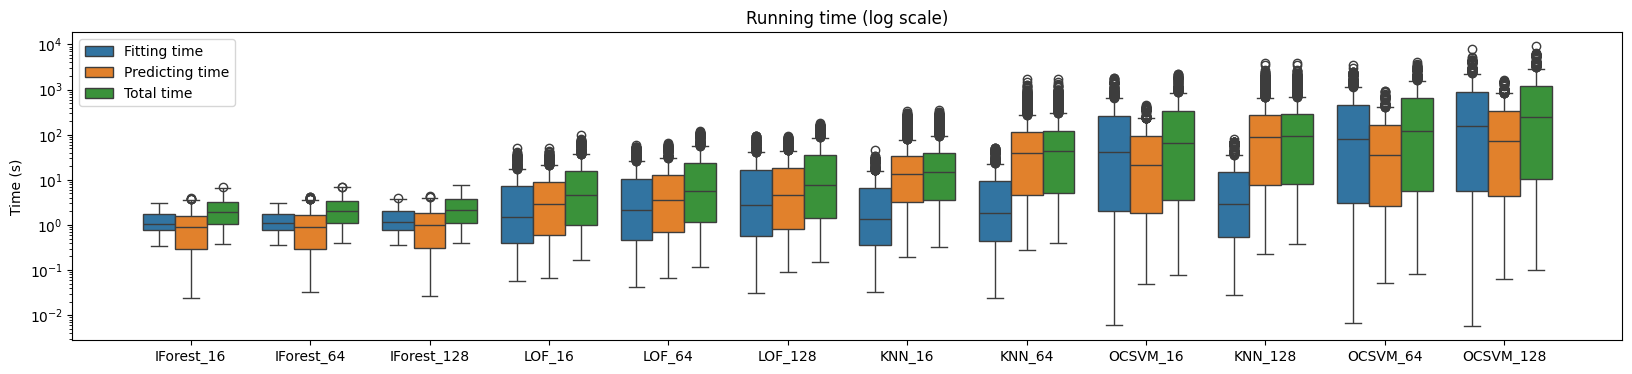

In [7]:
plot_performance(
    data=results,
    x_value='Raw anomaly detector',
    values_of_interest=['Time fit (s)', 'Time predict (s)', 'Total time (s)'],
    rename_values_of_interest={
        'Time fit (s)': 'Fitting time',
        'Time predict (s)': 'Predicting time',
        'Total time (s)': 'Total time',
    },
    title='Running time',
    y_label='Time (s)',
    y_log_scale=True
);

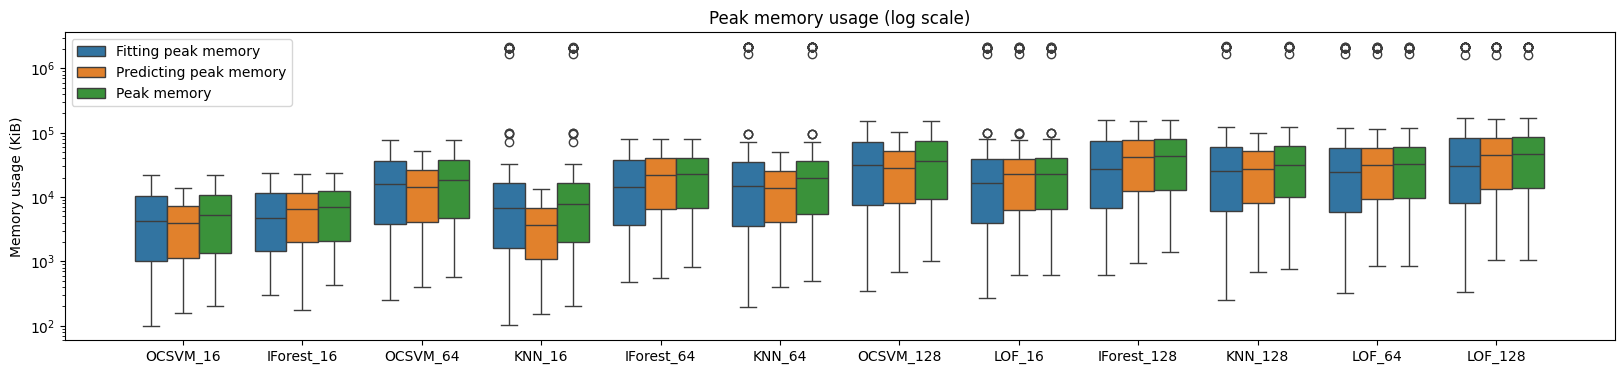

In [8]:
plot_performance(
    data=results,
    x_value='Raw anomaly detector',
    values_of_interest=['Peak memory fit (KiB)', 'Peak memory predict (KiB)', 'Peak memory (KiB)'],
    rename_values_of_interest={
        'Peak memory fit (KiB)': 'Fitting peak memory',
        'Peak memory predict (KiB)': 'Predicting peak memory',
        'Peak memory (KiB)': 'Peak memory',
    },
    title='Peak memory usage',
    y_label='Memory usage (KiB)',
    y_log_scale=True
);

### Aggregated results 

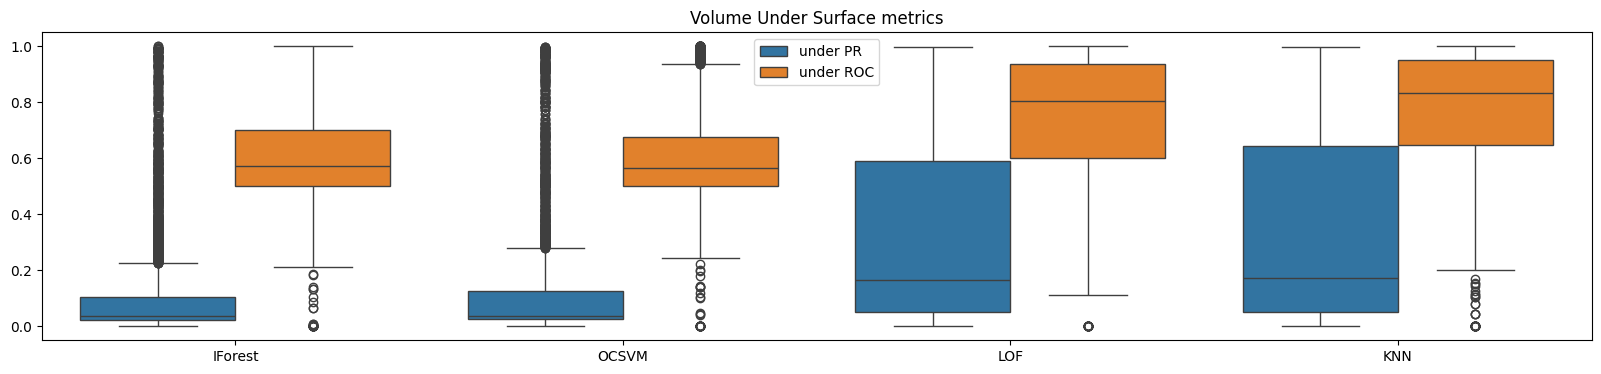

In [9]:
plot_performance(
    data=results,
    x_value='Anomaly detector',
    values_of_interest=['pr_vus', 'roc_vus'],
    rename_values_of_interest={
        'pr_vus': 'under PR',
        'roc_vus': 'under ROC'
    },
    title='Volume Under Surface metrics'
);

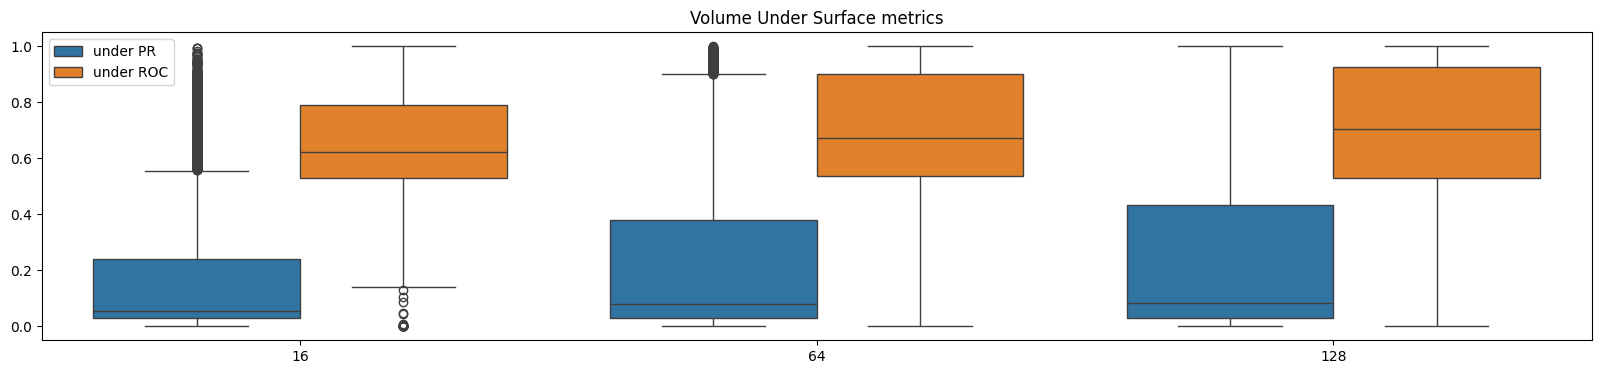

In [10]:
plot_performance(
    data=results,
    x_value='Window size',
    values_of_interest=['pr_vus', 'roc_vus'],
    rename_values_of_interest={
        'pr_vus': 'under PR',
        'roc_vus': 'under ROC'
    },
    title='Volume Under Surface metrics'
);

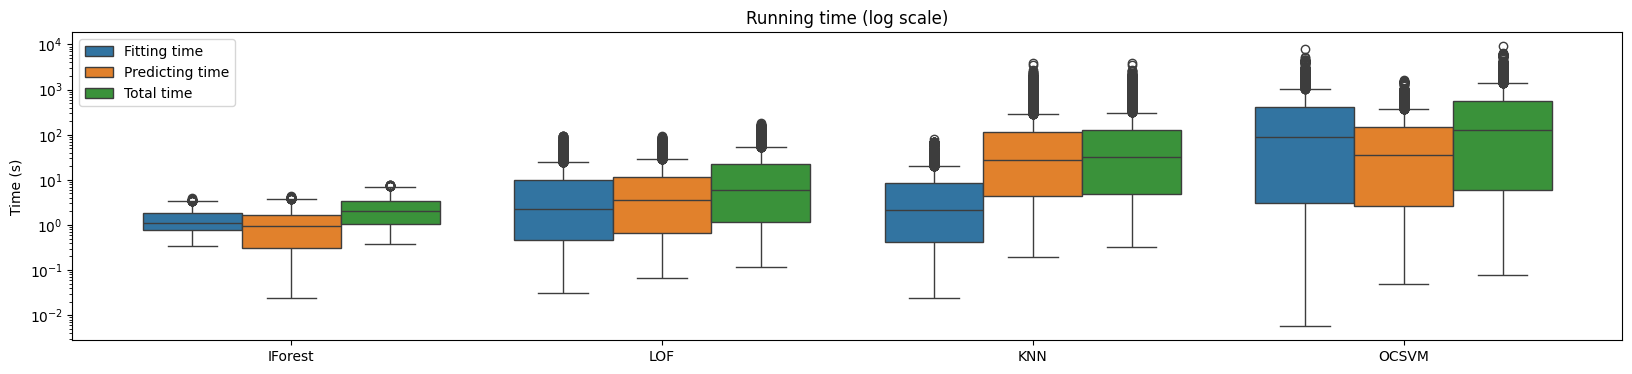

In [11]:
plot_performance(
    data=results,
    x_value='Anomaly detector',
    values_of_interest=['Time fit (s)', 'Time predict (s)', 'Total time (s)'],
    rename_values_of_interest={
        'Time fit (s)': 'Fitting time',
        'Time predict (s)': 'Predicting time',
        'Total time (s)': 'Total time',
    },
    title='Running time',
    y_label='Time (s)',
    y_log_scale=True
);

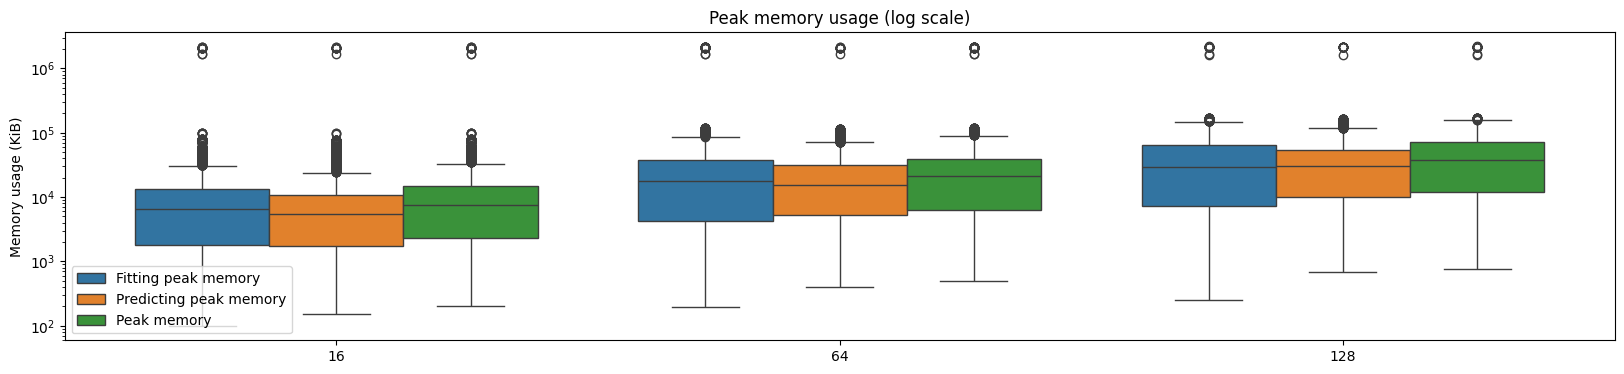

In [12]:
plot_performance(
    data=results,
    x_value='Window size',
    values_of_interest=['Peak memory fit (KiB)', 'Peak memory predict (KiB)', 'Peak memory (KiB)'],
    rename_values_of_interest={
        'Peak memory fit (KiB)': 'Fitting peak memory',
        'Peak memory predict (KiB)': 'Predicting peak memory',
        'Peak memory (KiB)': 'Peak memory',
    },
    title='Peak memory usage',
    y_label='Memory usage (KiB)',
    y_log_scale=True
);

### Ranking of the different methods

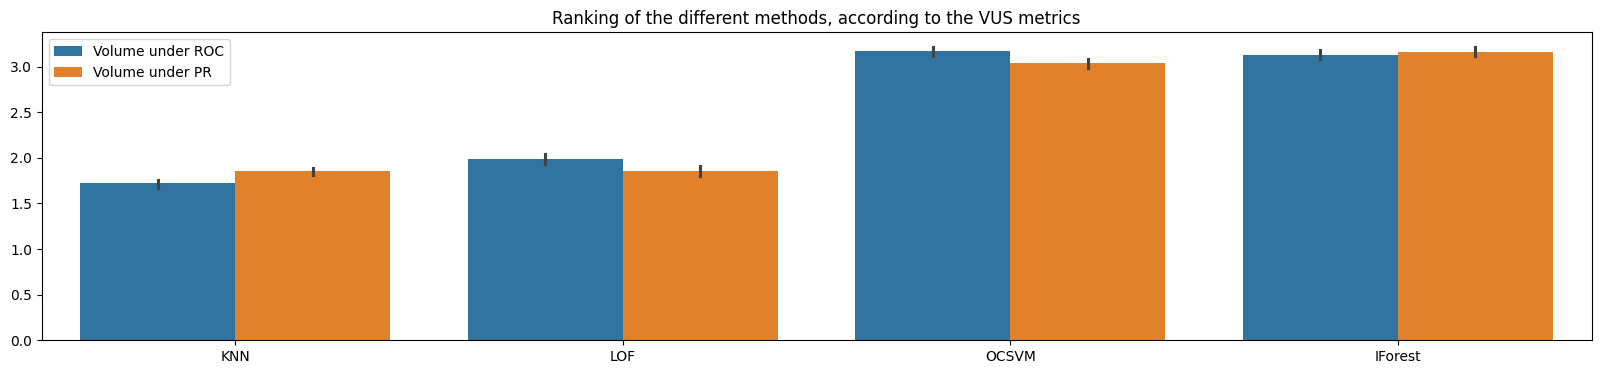

In [13]:
plot_ranking(
    data=results,
    x_value='Anomaly detector',
    values_of_interest=['roc_vus', 'pr_vus'],
    rename_values_of_interest={
        'pr_vus': 'Volume under PR',
        'roc_vus': 'Volume under ROC'
    },
    title='Ranking of the different methods, according to the VUS metrics',
    type_of_plot='bar',
    sort_results=True
);

C:\Users\louis\PycharmProjects\dtaianomaly\venv\lib\site-packages\scikit_posthocs\_posthocs.py:706: RuntimeWarning: invalid value encountered in sqrt
  tval = dif / np.sqrt(A) / np.sqrt(B)
C:\Users\louis\PycharmProjects\dtaianomaly\venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


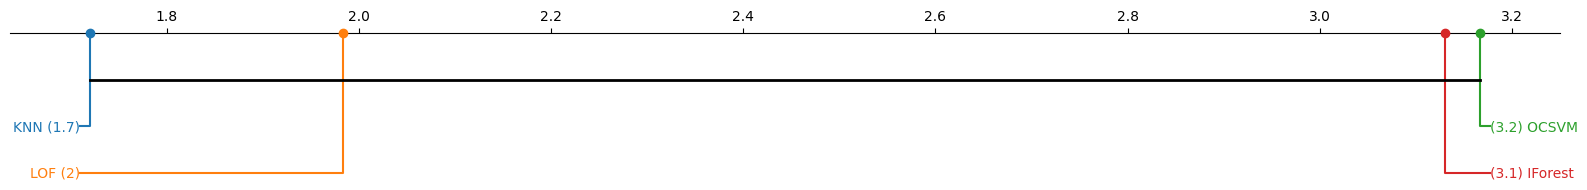

In [14]:
plot_critical_difference_diagram(
    results,
    group_measurements_by='Anomaly detector',
    score='roc_vus',
    fig_size=(20, 2)
);

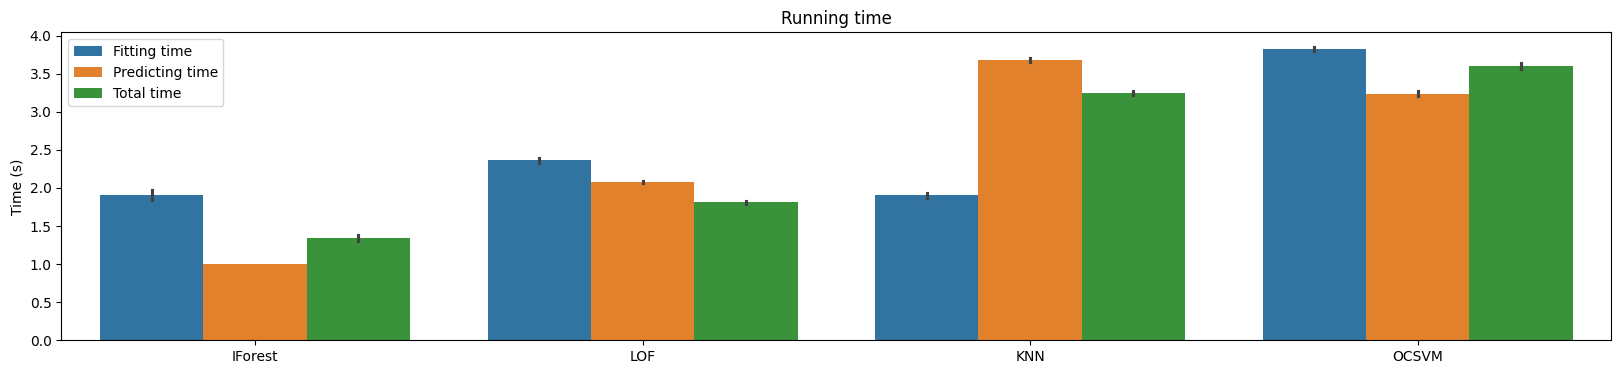

In [15]:
plot_ranking(
    data=results,
    x_value='Anomaly detector',
    values_of_interest=['Time fit (s)', 'Time predict (s)', 'Total time (s)'],
    rename_values_of_interest={
        'Time fit (s)': 'Fitting time',
        'Time predict (s)': 'Predicting time',
        'Total time (s)': 'Total time',
    },
    title='Running time',
    y_label='Time (s)',
    type_of_plot='bar',
    sort_results=True,
    smaller_is_better=True
);

### Quantification of benchmark difficulty

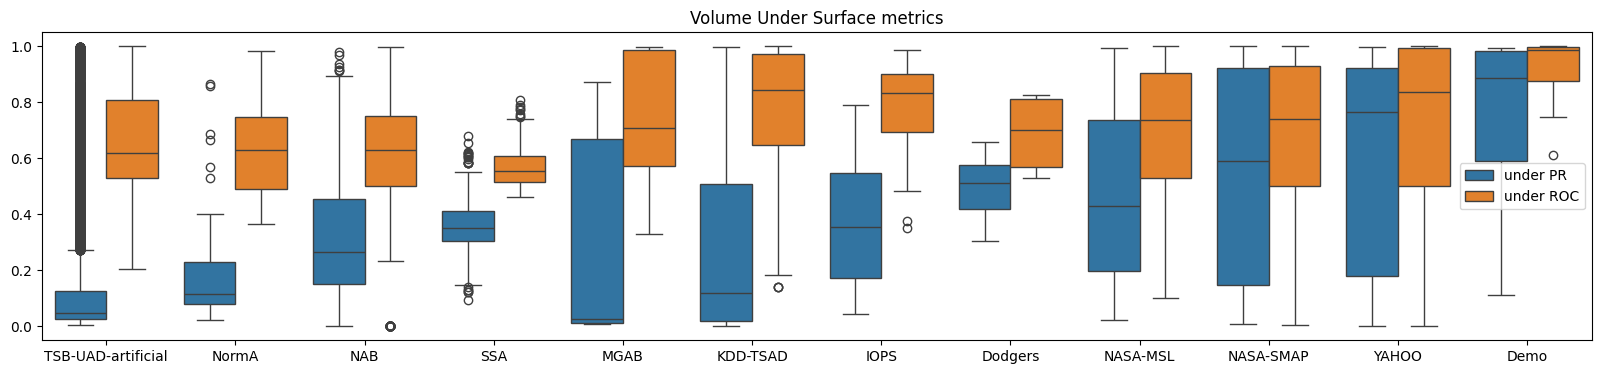

In [16]:
plot_performance(
    data=results.rename(columns={'collection_name': 'Collection name'}),
    x_value='Collection name',
    values_of_interest=['pr_vus', 'roc_vus'],
    rename_values_of_interest={
        'pr_vus': 'under PR',
        'roc_vus': 'under ROC'
    },
    title='Volume Under Surface metrics'
);